In [1]:
# Importing necessary libraries
import pandas as pd

# Load the dataset (assuming the file is in the current working directory)
df = pd.read_csv("creditcard.csv")

# Display the first few rows to get an overview of the dataset
df.head()

# Check the shape of the dataset and data types of each column
print("\nShape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)



Shape of dataset: (284807, 31)

Data Types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [2]:
# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64



Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


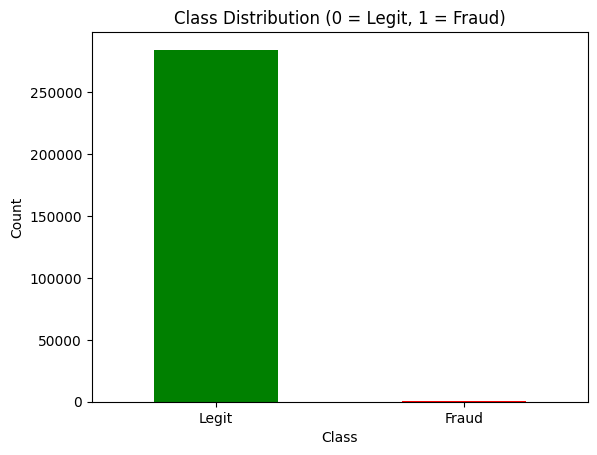

In [3]:
import matplotlib.pyplot as plt
# Plot class distribution (0 = Legit, 1 = Fraud)
class_counts = df['Class'].value_counts()

# Display the number of fraudulent and legitimate transactions
print("\nClass Distribution:\n", class_counts)

# Plot the distribution
class_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution (0 = Legit, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Legit', 'Fraud'], rotation=0)
plt.show()

In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Verify the new class distribution after SMOTE
print("\nClass distribution after SMOTE:\n", pd.Series(y_res).value_counts())


Class distribution after SMOTE:
 Class
0    227451
1    227451
Name: count, dtype: int64


In [5]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaler only on 'Amount' column
df['scaled_Amount'] = scaler.fit_transform(df[['Amount']])

# Optionally drop the original 'Amount' column if you no longer need it
df.drop(['Amount'], axis=1, inplace=True)

# Check result
print(df[['scaled_Amount']].head())


   scaled_Amount
0       0.244964
1      -0.342475
2       1.160686
3       0.140534
4      -0.073403


In [7]:
# Create 'Hour' feature from Time (assuming it's in seconds)
df['Hour'] = (df['Time'] // 3600) % 24

# Optionally drop Time
df.drop(['Time'], axis=1, inplace=True)

# Check result
print(df[['Hour']].head())


   Hour
0   0.0
1   0.0
2   0.0
3   0.0
4   0.0


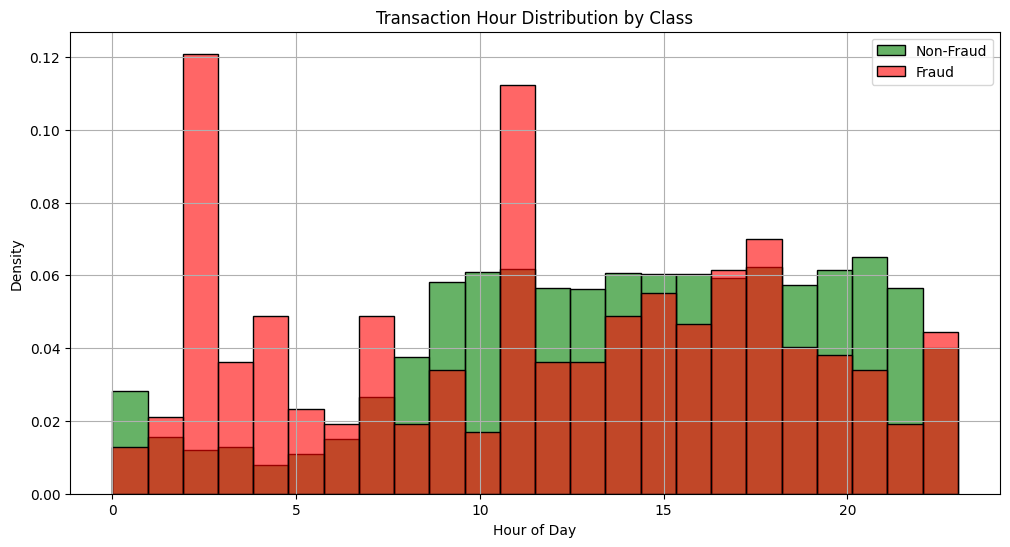

In [8]:
import seaborn as sns

# Plot fraud vs non-fraud distribution by Hour
plt.figure(figsize=(12,6))

# Non-fraud
sns.histplot(df[df['Class'] == 0]['Hour'], bins=24, color='green', label='Non-Fraud', kde=False, stat="density", alpha=0.6)

# Fraud
sns.histplot(df[df['Class'] == 1]['Hour'], bins=24, color='red', label='Fraud', kde=False, stat="density", alpha=0.6)

plt.title('Transaction Hour Distribution by Class')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Create the 'amount_percentile' feature
df['amount_percentile'] = df['scaled_Amount'].rank(pct=True) * 100

# Optional: round it if you want neat categories
df['amount_percentile'] = df['amount_percentile'].round(0)

# Let's see a sample
print(df[['scaled_Amount', 'amount_percentile']].head())


   scaled_Amount  amount_percentile
0       0.244964               86.0
1      -0.342475               19.0
2       1.160686               95.0
3       0.140534               83.0
4      -0.073403               73.0


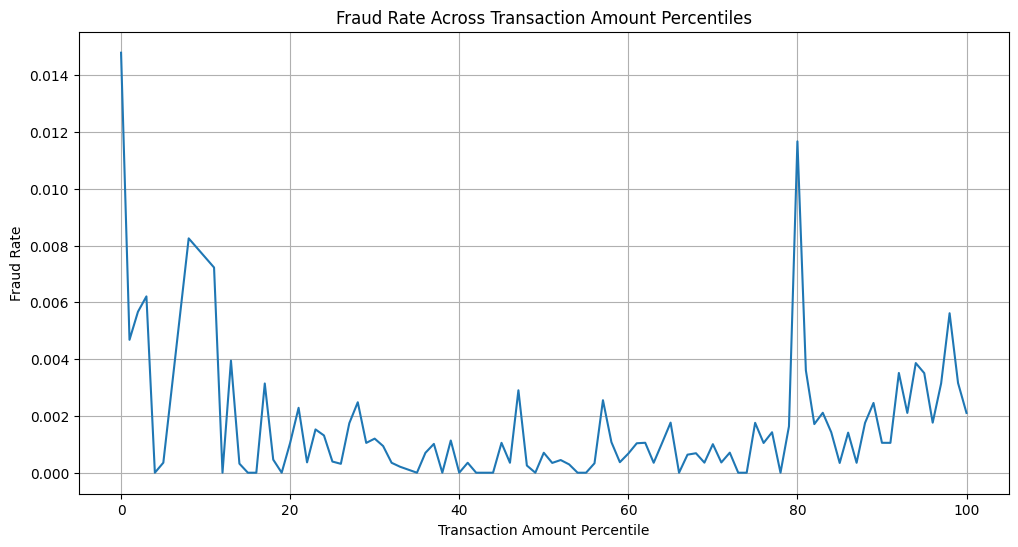

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy for easier plotting
plot_df = df.copy()

# Group by amount_percentile and calculate fraud rate
fraud_rate = plot_df.groupby('amount_percentile')['Class'].mean()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=fraud_rate.index, y=fraud_rate.values)
plt.title('Fraud Rate Across Transaction Amount Percentiles')
plt.xlabel('Transaction Amount Percentile')
plt.ylabel('Fraud Rate')
plt.grid(True)
plt.show()


In [11]:
def amount_spender_category(x):
    if x < 5:
        return 'low_spender_risky'
    elif x > 80:
        return 'high_spender_risky'
    else:
        return 'mid_spender_safe'

# Apply
df['amount_spender_category'] = df['amount_percentile'].apply(amount_spender_category)

In [13]:
# Step 1: Calculate Mean and Std Dev
amount_mean = df['amount'].mean()
amount_std = df['amount'].std()

# Step 2: Create a new feature "amount_zscore"
df['amount_zscore'] = (df['amount'] - amount_mean) / amount_std

KeyError: 'amount'

In [12]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Class,scaled_Amount,Hour,amount_percentile,amount_spender_category
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,0.0,86.0,high_spender_risky
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,0.0,19.0,mid_spender_safe
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,0.0,95.0,high_spender_risky
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,0.0,83.0,high_spender_risky
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,0.0,73.0,mid_spender_safe


In [13]:
import pandas as pd

# One-hot encode the 'amount_spender_category' column
df_encoded = pd.get_dummies(df, columns=['amount_spender_category'], drop_first=True)

# Check the new columns
print(df_encoded.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'scaled_Amount', 'Hour', 'amount_percentile',
       'amount_spender_category_low_spender_risky',
       'amount_spender_category_mid_spender_safe'],
      dtype='object')


In [14]:
df_encoded.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,Class,scaled_Amount,Hour,amount_percentile,amount_spender_category_low_spender_risky,amount_spender_category_mid_spender_safe
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,0.0,86.0,False,False
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,0.0,19.0,False,True
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,0.0,95.0,False,False
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.647376,-0.221929,0.062723,0.061458,0,0.140534,0.0,83.0,False,False
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,0.0,73.0,False,True


In [16]:
# Convert all bool columns in the entire dataframe
df_encoded = df_encoded.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. Separate features (X) and target (y)
X = df_encoded.drop('Class', axis=1)  # Updated features after one-hot encoding
y = df_encoded['Class']

# 2. Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 4. Check new class balance
print(pd.Series(y_train_resampled).value_counts())


Class
0    227451
1    227451
Name: count, dtype: int64


In [19]:
df_encoded.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,Class,scaled_Amount,Hour,amount_percentile,amount_spender_category_low_spender_risky,amount_spender_category_mid_spender_safe
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,0.0,86.0,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,0.0,19.0,0,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,0.0,95.0,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.647376,-0.221929,0.062723,0.061458,0,0.140534,0.0,83.0,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,0.0,73.0,0,1


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{name}")
    print("-" * len(name))
    
    # Train
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Results
    print(classification_report(y_test, y_pred, digits=4))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred):.4f}")



Logistic Regression
-------------------
              precision    recall  f1-score   support

           0     0.9998    0.9743    0.9869     56864
           1     0.0573    0.9082    0.1079        98

    accuracy                         0.9742     56962
   macro avg     0.5286    0.9412    0.5474     56962
weighted avg     0.9982    0.9742    0.9854     56962

ROC-AUC Score: 0.9412

Random Forest
-------------
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     56864
           1     0.9011    0.8367    0.8677        98

    accuracy                         0.9996     56962
   macro avg     0.9504    0.9183    0.9338     56962
weighted avg     0.9995    0.9996    0.9996     56962

ROC-AUC Score: 0.9183

XGBoost
-------


C:\Users\parul\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:57:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0     0.9997    0.9996    0.9996     56864
           1     0.7664    0.8367    0.8000        98

    accuracy                         0.9993     56962
   macro avg     0.8830    0.9181    0.8998     56962
weighted avg     0.9993    0.9993    0.9993     56962

ROC-AUC Score: 0.9181


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define a better Random Forest
rf_model = RandomForestClassifier(
    n_estimators=300,      # More trees
    max_depth=12,          # Limit depth to prevent overfitting
    min_samples_split=5,   # Minimum samples to split an internal node
    min_samples_leaf=3,    # Minimum samples at a leaf node
    random_state=42,
    n_jobs=-1              # Use all processors
)

# Train
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
print("\nOptimized Random Forest Results:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))



Optimized Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.61      0.86      0.71        98

    accuracy                           1.00     56962
   macro avg       0.80      0.93      0.86     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9280966114639441


In [23]:
from sklearn.metrics import precision_recall_curve,roc_auc_score,classification_report, confusion_matrix, average_precision_score, auc

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))
auprc = average_precision_score(y_test, y_proba)
print(f"AUPRC Score: {auprc:.4f}")

Confusion Matrix:
 [[56839    25]
 [   16    82]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.84      0.80        98

    accuracy                           1.00     56962
   macro avg       0.88      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962


ROC AUC Score: 0.9846518869224673
AUPRC Score: 0.8659
